# Simple Linear Regression

In [30]:
#import necessory Libraries 
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
#Load the dataset
wcat=pd.read_csv("wc-at.csv")
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


# EDA

In [32]:
#Check the Data Structure
wcat.info


<bound method DataFrame.info of       Waist      AT
0     74.75   25.72
1     72.60   25.89
2     81.80   42.60
3     83.95   42.80
4     74.65   29.84
..      ...     ...
104  100.10  124.00
105   93.30   62.20
106  101.80  133.00
107  107.90  208.00
108  108.50  208.00

[109 rows x 2 columns]>

In [33]:
#Summerize the Dataset
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


Average waist is 91.90 and min is 63.50 and max is 121

Average AT is 101.89 and min is 11.44 and max is 253

In [34]:
import matplotlib.pyplot as plt

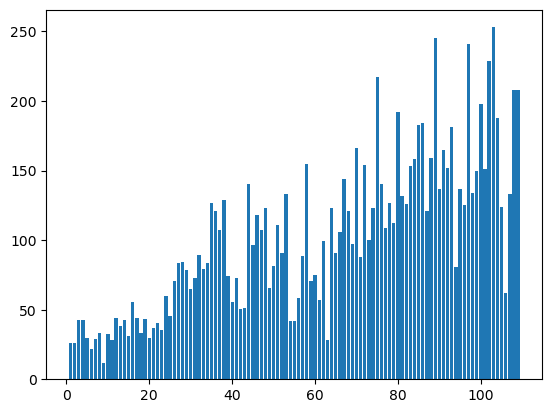

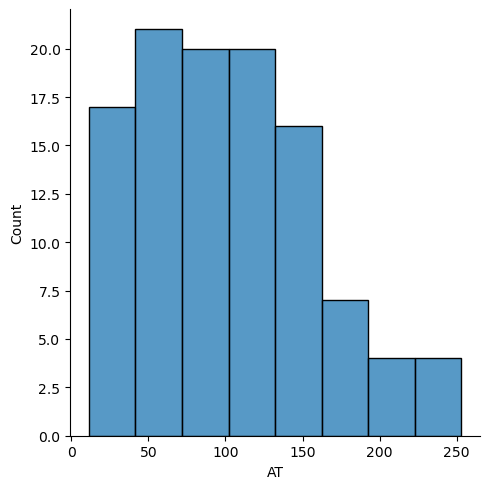

In [35]:
# Visualize dataset
## Bar plot of AT values
plt.bar(height=wcat.AT,x=np.arange(1,110,1))# Creates a bar chart where the height represents 'AT' values and the x-axis ranges from 1 to 110
# Distribution plot of AT values
sns.displot(wcat.AT)# Displays a histogram to show the distribution of 'AT' values

{'whiskers': [<matplotlib.lines.Line2D at 0x228662c6d90>,
 'caps': [<matplotlib.lines.Line2D at 0x228662d8190>,
 'boxes': [<matplotlib.lines.Line2D at 0x228662c6410>],
 'medians': [<matplotlib.lines.Line2D at 0x228662bb110>],
 'fliers': [<matplotlib.lines.Line2D at 0x22865fdb250>],
 'means': []}

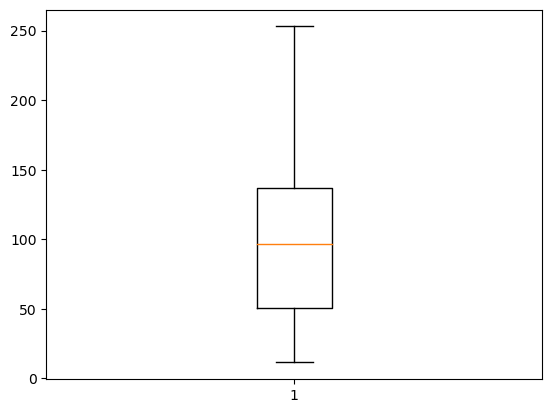

In [36]:
#Data is normal but right skewed
plt.boxplot(wcat.AT)

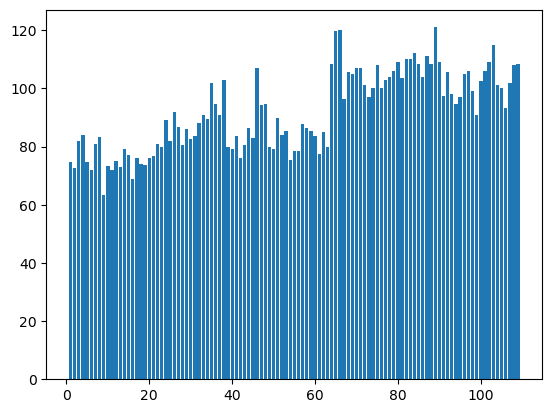

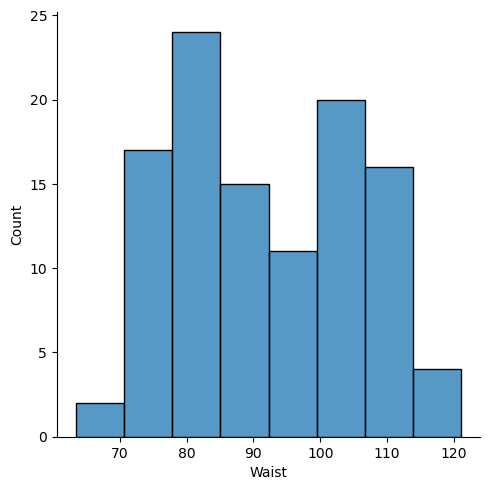

In [37]:
#No outliers but right skewed
# Bar plot of Waist values
plt.bar(height=wcat.Waist,x=np.arange(1,110,1))# Creates a bar chart where the height represents 'Waist' values and the x-axis ranges from 1 to 110
# Distribution plot of Waist values
sns.displot(wcat.Waist)# Displays a histogram to show the distribution of 'Waist' values

{'whiskers': [<matplotlib.lines.Line2D at 0x228664f4490>,
 'caps': [<matplotlib.lines.Line2D at 0x228664f5810>,
 'boxes': [<matplotlib.lines.Line2D at 0x228664e7b10>],
 'medians': [<matplotlib.lines.Line2D at 0x228664f6810>],
 'fliers': [<matplotlib.lines.Line2D at 0x228664f4390>],
 'means': []}

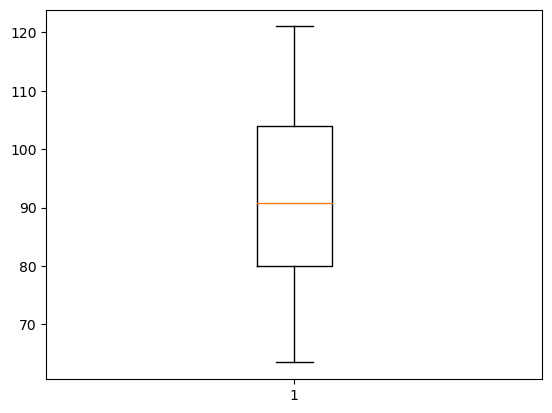

In [38]:
#Data is normal bimodal
plt.boxplot(wcat.Waist)
#No outliers but right skewed

# Bivariant analysis

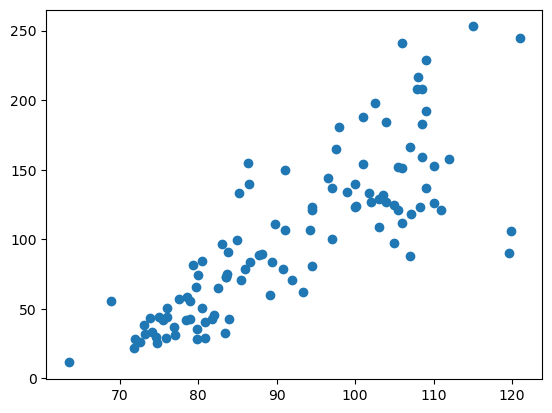

In [39]:
# Scatter plot between Waist and AT
plt.scatter(x=wcat.Waist,y=wcat.AT)# Visualizes the relationship between 'Waist' and 'AT'

Data is linearly scattered,direction positive,strength:poor

Now let us check the correlation coeficient

In [40]:
# Check correlation between Waist and AT
np.corrcoef(wcat.Waist,wcat.AT)# Computes and returns the Pearson correlation coefficient matrix


array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

The corellation coeficient is 0.81855781.85 hence the correlation strong positive correlation

In [41]:
#Let us check the direction of correlation
cov_output=np.cov(wcat.Waist,wcat.AT)[0,1] # Calculates covariance between Waist and AT
cov_output# Displays the covariance value

635.9100064135235

635.9100064135235 is positive means correlation will be positive

In [42]:
#let us apply to various models and check the feasibilty
import statsmodels.formula.api as smf# Import statsmodels for OLS regression

# First simple linear model


In [43]:
model=smf.ols("AT~Waist",data=wcat).fit()# Fits a simple linear regression model (AT as dependent, Waist as independent)
#Y is AT and X is waist
model.summary()# Displays the summary of the model (R-squared, coefficients, p-values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.62e-27
Time:                        21:24:33   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squarred=0.670<0.85,there is scope of improvement

P=0.0<0.05 hence accepatable

bita~0=-215.9815

bita~1=3.4589

In [44]:
# Predict AT values using the model
pred1=model.predict(pd.DataFrame(wcat.Waist))# Generates predicted AT values
pred1# Display predicted values

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

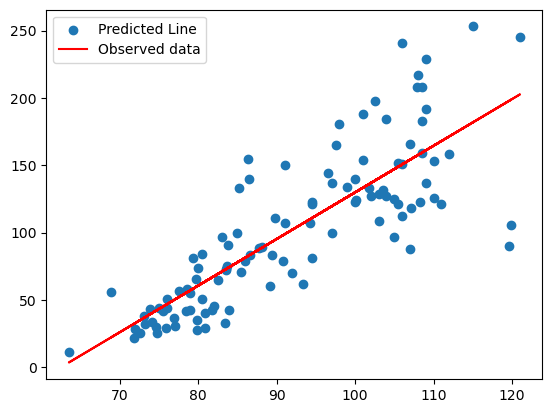

In [45]:
#Regression line visualization
plt.scatter(wcat.Waist,wcat.AT) # Scatter plot of observed data
plt.plot(wcat.Waist,pred1,'r') # Plot the regression line in red
plt.legend(['Predicted Line','Observed data'])# Add legend
plt.show()# Display the plot

In [46]:
#Error calculation
res1=wcat.AT-pred1# Calculate residuals (actual - predicted)
np.mean(res1)# Mean of residuals (should be close to zero)
res_sqr1=res1*res1 # Square the residuals
msel=np.mean(res_sqr1)# Mean of squared errors (MSE)
rmsel=np.sqrt(msel)# Root mean squared error (RMSE)
rmsel# Display RMSE (32.76)
#32.760177495755144

32.760177495755144

# Let us try another model

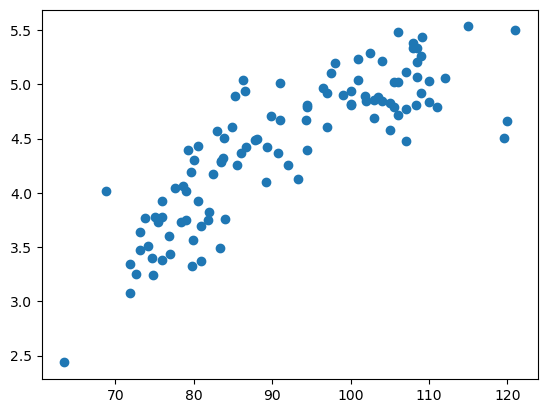

In [47]:
# Log Transformation Model (Y = log(AT))
plt.scatter(x=wcat.Waist,y=np.log(wcat.AT)) # Scatter plot of Waist vs log(AT)

Data is linearly scattered,direction positive,strength:poor

Now let us check the correlation coeficient

In [48]:
np.corrcoef(wcat.Waist,np.log(wcat.AT)) # Correlation between Waist and log(AT)

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

The corellation coeficient is 0.84090069<0.85 hence the correlation

r=0.8409

In [49]:
# Fit log-transformed model
model3=smf.ols("np.log(AT)~Waist",data=wcat).fit()# Fits a model with log(AT) as dependent variable
#Y is np.log(AT) and X is waist
model3.summary()# Displays model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           2.68e-30
Time:                        21:24:42   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squarred=0.707<0.85,there is scope of improvement

P=0.0<0.05 hence accepatable

bita~0=0.7410

bita~1=0.0403

In [50]:
pred3=model3.predict(pd.DataFrame(wcat.Waist))# Predicted log(AT)
pred3_at=np.exp(pred3)# Convert predictions back to original scale
pred3_at# Display predicted AT values

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

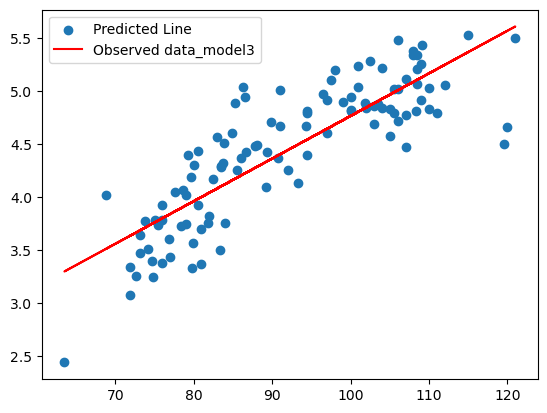

In [51]:
#Regression line
plt.scatter(wcat.Waist,np.log(wcat.AT))# Scatter plot of Waist vs log(AT)
plt.plot(wcat.Waist,pred3,'r')# Regression line
plt.legend(['Predicted Line','Observed data_model3'])# Add legend
plt.show()# Display the plot

In [52]:
#Error calculation for log model
res3=wcat.AT-pred3_at # Calculate residuals
res_sqr3=res3*res3# Square the residuals
msel=np.mean(res_sqr3)# Mean squared error (MSE)
rmsel3=np.sqrt(msel)# Root mean squared error (RMSE)
rmsel3# Display RMSE (38.53)
#38.52900175807143
#There are no significant change r=0.8409,r^2=0.707 and rsme=38.52900175807143

38.52900175807143

# Hence Let us try another model

## Polynomial model

In [53]:
#Here r can not be calculated
model4=smf.ols("np.log(AT)~Waist+I(Waist*Waist)",data=wcat).fit() #Polynomial regression (log(AT) ~ Waist + Waist^2)
#Y is np.log(AT) and X is waist
model4.summary()# Displays polynomial model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.80e-35
Time:                        21:24:48   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squarred=0.779<0.85,there is scope of improvement

P=0.0<0.05 hence accepatable

bita~0=-7.8241

bita~1=0.2289 

In [54]:
# Predict and reverse log transformation for polynomial model
pred4=model4.predict(pd.DataFrame(wcat.Waist)) # Predicted log(AT) using polynomial model
pred4
pred4_at=np.exp(pred4) # Convert predictions back to original scale
pred4_at # Display predicted AT values

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

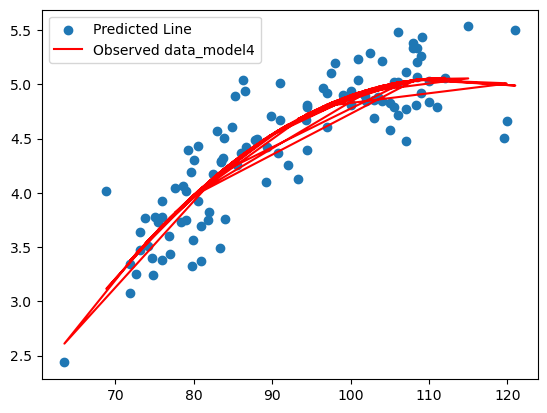

In [55]:
#Regression line visualization for polynomial model
plt.scatter(wcat.Waist,np.log(wcat.AT))# Scatter plot of Waist vs log(AT)
plt.plot(wcat.Waist,pred4,'r')# Polynomial regression line
plt.legend(['Predicted Line','Observed data_model4'])# Add legend
plt.show()# Display the plot

In [56]:
#Error calculation for polynomial model
res4=wcat.AT-pred4_at # Calculate residuals
res_sqr4=res4*res4 # Square the residuals
msel=np.mean(res_sqr4) # Mean squared error (MSE)
rmsel=np.sqrt(msel)# Root mean squared error (RMSE)
rmsel # Display RMSE (32.24)
#32.244447827762464

32.244447827762464

### We have to generalize the best model

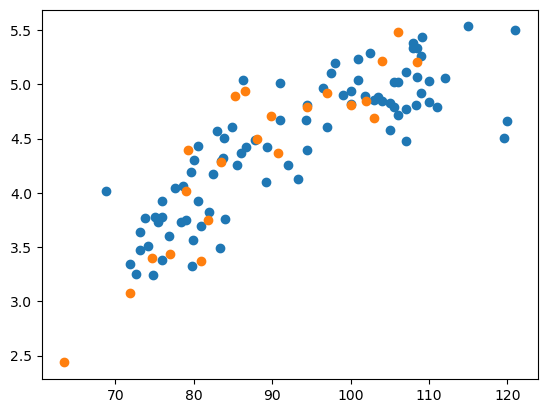

In [57]:
# Train-test split
from sklearn.model_selection import train_test_split  #Import train_test_split function

# Split dataset into training and testing sets
train,test=train_test_split(wcat,test_size=0.2) # 80% train, 20% test
plt.scatter(train.Waist, np.log(train.AT)) # Scatter plot for training data
plt.scatter(test.Waist, np.log(test.AT)) # Scatter plot for testing data

# Final Model using polynomial regression
final_model=smf.ols('np.log(AT)~Waist+I(Waist*Waist)',data=wcat).fit() # Fit final model


In [58]:
# Final model summary
#Y is np.log(AT) and X is waist
final_model.summary()# Display model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.80e-35
Time:                        21:24:55   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squarred=0.779<0.85,there is scope of improvement

P=0.0<0.05 hence accepatable

bita~0=-7.8241

bita~1=0.2289 

In [59]:
test_pred=final_model.predict(pd.DataFrame(test)) # Predict on test data
test_pred_at=np.exp(test_pred)# Convert back to original scale
test_pred_at# Display test predictions

32     97.303945
5      29.174597
49     51.107053
76    143.609840
94    123.157825
39     50.075256
14     43.505263
73    134.213265
34    140.692416
31     85.696002
6      56.804132
52     73.542120
85    146.290109
30     66.703124
8      13.610862
35    113.052967
84    155.034904
50     92.992407
4      36.497176
96    150.878818
2      60.145769
43     78.927920
dtype: float64

In [60]:
# Predictions on train data
train_pred = final_model.predict(pd.DataFrame(train))# Predict on train data
train_pred_at = np.exp(train_pred) # Convert back to original scale
train_pred_at# Display train predictions

90     125.093851
67     149.832482
97     130.687397
74     154.351415
102    156.780640
          ...    
57      78.091817
42      55.349922
61      72.317089
3       68.488132
75     134.213265
Length: 87, dtype: float64

In [61]:
#Evalution on test data
test_res=test.AT-test_pred_at # Calculate residuals on test data
test_sqr=test_res*test_res # Square the residuals
test_mse=np.mean(test_sqr) # Mean squared error (MSE)
test_rmse=np.sqrt(test_mse) # Root mean squared error (RMSE)
test_rmse #Display RMSE (31.16)
#31.166396245162282

31.869712190061865

In [62]:
#Evalution on train data
train_res=train.AT-train_pred_at # Calculate residuals on test data
train_sqr=train_res*train_res # Square the residuals
train_mse=np.mean(train_sqr) # Mean squared error (MSE)
train_rmse=np.sqrt(train_mse)  # Root mean squared error (RMSE)
train_rmse #Display RMSE (31.16)
#32.51139635824184


32.338520694470546

In [63]:
# Comparison:test_rmse>train_rmse  # Model slightly underfits training data